## 2022.09.06.(화) ___과제 
---
- 목 적 => 이미지 분류 모델
- 데 이 터 => Fashion-mnist
- 전제조건 => 교차검증진행

**1. 최적의 하이퍼파라미터 설정**  
**2. 새로운 데이터로 예측 ==> predict**

##### [1] 데이터 탐색

In [6]:
# 데이터 불러오기 
import tensorflow as tf

# tf.keras.datasets에서 제공하는 fashion_mnist 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist

# load_data() => NumPy array의 튜플을 반환
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [7]:
# 데이터 갯수, 행열 파악)
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
# labels 종류확인 (1~9)
import numpy as np
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
# 세부 값 확인
print(train_labels[0])
print(train_images[0])

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

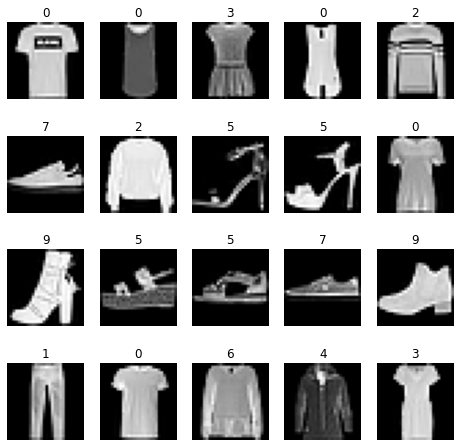

In [10]:
# 데이터샘플 시각화
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

for i in range(1,21):
    fig.add_subplot(4,5,i)
    plt.title(train_labels[i])
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')
    #plt.colorbar()
plt.show()

##### [2] 데이터셋 전처리

In [11]:
# 0에서 255 사이의 값을 갖는 훈련/테스트 데이터들을 0.0~1.0 사이의 값을 갖도록 변환
train_images, test_images = train_images / 255 , test_images /255

In [12]:
# dim3 -> dim2 로 변환
train_images_dim2 = train_images.reshape(-1,28**2)
test_images_dim2 = test_images.reshape(-1,28**2)

#### [3-1] SVC 최적의 하이퍼파라미터 찾기 
---

In [13]:
# svc, 랜덤포레스트
from sklearn.svm import SVC

# Grid Search
from sklearn.model_selection import GridSearchCV

In [14]:
# 랜덤추출로 데이터 개수 1%만 추출
np.random.seed(42)
num_random = np.random.choice(60000,size=600)

train_images_random = train_images_dim2[num_random]
train_labels_random = train_labels[num_random]

In [15]:
# 모델 생성
model_SVC = SVC()
model_SVC.fit(train_images_random,train_labels_random)


SVC()

In [16]:
# 파라미터 최적화 전, SVC 정확도 확인
print('랜덤추출 훈련데이터셋 점수:', model_SVC.score(train_images_random,train_labels_random))
print('전체 훈련데이터셋 점수:', model_SVC.score(train_images_dim2,train_labels))
print('전체 테스트셋 점수:', model_SVC.score(test_images_dim2,test_labels))


랜덤추출 훈련데이터셋 점수: 0.8766666666666667
전체 훈련데이터셋 점수: 0.77695
전체 테스트셋 점수: 0.7694


In [17]:

# Grid_Search
param_range = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
param_grid = { 
    'C' : param_range,
    'kernel':['linear', 'sigmoid', 'poly', 'rbf' ],
    'gamma': param_range
}

GS = GridSearchCV(
    estimator = model_SVC, 
    param_grid = param_grid,
    cv = 5,
    scoring='accuracy',
    return_train_score = True
)

In [18]:
GS.fit(train_images_random,train_labels_random)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000],
                         'kernel': ['linear', 'sigmoid', 'poly', 'rbf']},
             return_train_score=True, scoring='accuracy')

In [19]:
# 최적의 파라미터 확인
print(GS.best_score_)
print(GS.best_estimator_)
print(GS.best_params_)

0.7866666666666666
SVC(C=100, gamma=0.01)
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


#### [3-2] RandomForest 최적의 하이퍼파라미터 찾기 
---

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
# 모델 생성
model_RF = RandomForestClassifier()
model_RF.fit(train_images_random,train_labels_random)

# 하이퍼파라미터 최적화 전 정확도
print('랜덤추출 훈련데이터셋 점수:', model_RF.score(train_images_random,train_labels_random))
print('전체 훈련데이터셋 점수:', model_RF.score(train_images_dim2,train_labels))
print('전체 테스트셋 점수:', model_RF.score(test_images_dim2,test_labels))


랜덤추출 훈련데이터셋 점수: 1.0
전체 훈련데이터셋 점수: 0.7946666666666666
전체 테스트셋 점수: 0.7874


#### [ 랜덤포레스트 하이퍼파라미터 ]
##### min_samples_split
- 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합 제어에 사용. 
- default는 2이다. 작게 설정할수록 분할되는 노드가 많아져 과적합 가능성 증가.  
         
##### min_samples_leaf
- 말단 노드가 되기위한 최소한의 샘플 수.
- 과적합 제어 용도. 비대칭적 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있어 이 경우에는 작게 설정.

##### max_features
-   최적의 분할을 위해 고려할 최대 feature 개수. default는 None으로 데이터 세트의 모든 feature을 사용하여 분할.
- int로 지정 시 대상 feature 개수, float로 지정 시 전체 feature중 대상 feature의 퍼센트
- sqrt는 전체 feature중 제곱근 값.
- auto는 sqrt와 동일
- log는 전체 featur을 log2()로 선정

##### max_depth
- 트리의 최대 깊이 지정
- default는 None. 이는 완벽히 클래스 결정값이 될때 까지 깊이를 계속 키우거나 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때 까지 계속 분할
- 깊이가 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적당한 값으로 제어.

##### max_leaf_nodes
- 말단 노드 최대 개수

In [22]:
# 모델 생성
model_RF = RandomForestClassifier()

# Grid_Search
param_range = [5,10,15]
param_grid = { 
    'criterion' : ['gini','entropy'],
    'max_depth':param_range,
    'max_features':param_range,
    'min_samples_split': param_range,
}

GS = GridSearchCV(
    estimator = model_RF, 
    param_grid = param_grid,
    cv = 5,
    scoring='accuracy',
    return_train_score = True
)

In [23]:
GS.fit(train_images_random,train_labels_random)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15], 'max_features': [5, 10, 15],
                         'min_samples_split': [5, 10, 15]},
             return_train_score=True, scoring='accuracy')

In [24]:
# 최적의 파라미터 확인
print(GS.best_score_)
print(GS.best_estimator_)
print(GS.best_params_)

0.7883333333333333
RandomForestClassifier(max_depth=10, max_features=15, min_samples_split=10)
{'criterion': 'gini', 'max_depth': 10, 'max_features': 15, 'min_samples_split': 10}
